<a href="https://colab.research.google.com/github/stm010/dsci100/blob/main/homework_dci100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.spatial.distance import cdist
import pandas as pd

**Using RBF with cross validation to interpolate data**

Below is the RBF code we developed in class.
We will use this code to interpolate some pressure data that is given next.

In [2]:
def RBFinterp(Xobs, f, XI, eps=0.01):
  # Given data f(x,y)
  # interpolate to new points s(xI, yI)

  # find pairwise distance
  D = cdist(Xobs, Xobs, metric='euclidean')

  # setup the linear system
  A = np.exp(-D * eps)
  c = np.linalg.solve(A, f)

  DI = cdist(XI, Xobs, metric='euclidean')
  AI = np.exp(-DI * eps)

  fI = AI @ c
  return fI


1. Using pandas commands Load the file Data.csv (look for the read command for csv)

2. The file as tree columns of data. The first is the x-location, the second is the y location and the third is the relative pressure which is noisy.
Find a way to extract these data into three numpy vectors, xobs, yobs and fobs.

3. Use plt.scatter to plot the vectors with collor of each dot determined by fobs.

4. Use the interpolation function to interpolate it to a grid of x,y spanned from x=[-4,4], y=[-5,5] wich
100 intervals each.

5. Cross Validation - Separate the data to the first 900 points and the rest. The first 900 will be used for interpolation and the last 100 for validation.

6. Use epsilon ranging from 0.0001 to 1000 and record the validation error for each epsilon.
Plot the error as a function of epsilon, comment on the best value of epsilon.

In [14]:
data.shape
print(xobs.shape, yobs.shape, fobs.shape)

(1000,) (1000,) (1000,)


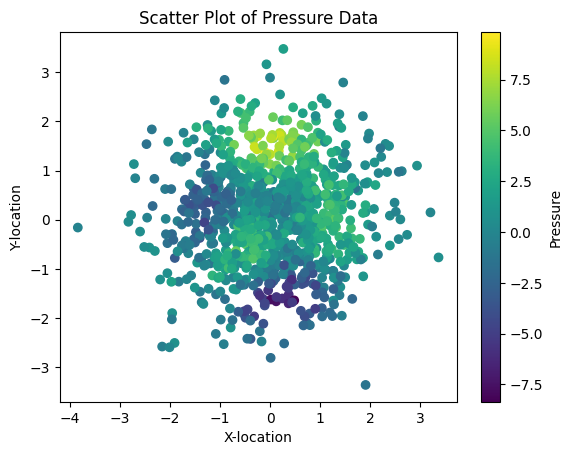

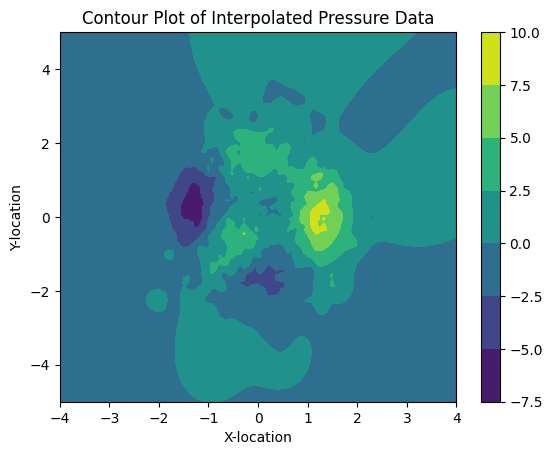

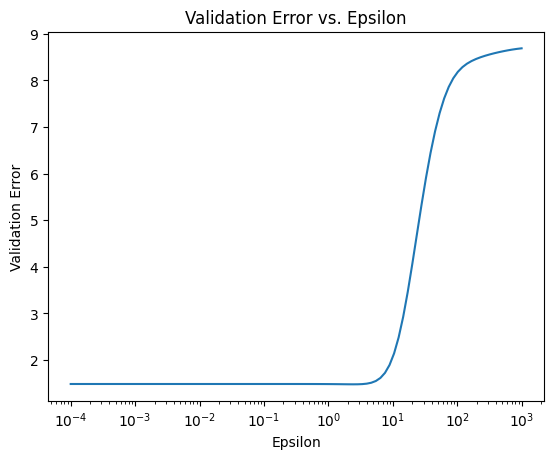

Best epsilon: 2.4201282647943834


In [24]:
# 1.
data = pd.read_csv('Data.csv', header=None)
data.shape

# 2.
xobs = data.iloc[:, 0].to_numpy()  # Access the first column (index 0) for x-location
yobs = data.iloc[:, 1].to_numpy()  # Access the second column (index 1) for y-location
fobs = data.iloc[:, 2].to_numpy()  # Access the third column (index 2) for relative pressure

# 3.
plt.scatter(xobs, yobs, c=fobs)
plt.colorbar(label='Pressure')  # Add a colorbar for clarity
plt.xlabel('X-location')
plt.ylabel('Y-location')
plt.title('Scatter Plot of Pressure Data')
plt.show()

# 4.
# Create the interpolation grid
xI = np.linspace(-4, 4, 100)
yI = np.linspace(-5, 5, 100)

XI = np.array(np.meshgrid(xI, yI)).T.reshape(-1,2)

# Perform interpolation
fI = RBFinterp(np.array([xobs, yobs]).T, fobs, XI)


plt.contourf(xI, yI, fI.reshape(100,100), cmap='viridis')
#plt.scatter(xobs, yobs, c=fobs, cmap='viridis', edgecolors='k', s=15, alpha=0.8)
plt.colorbar()
plt.xlabel('X-location')
plt.ylabel('Y-location')
plt.title('Contour Plot of Interpolated Pressure Data')
plt.show()

# 5.
Xobs_train = xobs[:900]
yobs_train = yobs[:900]
fobs_train = fobs[:900]
Xobs_val = xobs[900:]
yobs_val = yobs[900:]
fobs_val = fobs[900:]

# 6.
# Perform cross-validation for different epsilon values
epsilons = np.logspace(-4, 3, 100)
#epsilons = np.linspace(-4, 3, 100)
validation_errors = []

for eps in epsilons:
  # Interpolate using training data
  fI_val = RBFinterp(np.column_stack((Xobs_train, yobs_train)), fobs_train, np.column_stack((Xobs_val, yobs_val)), eps=eps)

  # Calculate validation error (e.g., mean squared error)
  error = np.mean((fI_val - fobs_val)**2)
  validation_errors.append(error)

# Plot validation error vs. epsilon
plt.plot(epsilons, validation_errors)
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Validation Error')
plt.title('Validation Error vs. Epsilon')
plt.show()

# Find the best epsilon value
best_epsilon = epsilons[np.argmin(validation_errors)]
print(f"Best epsilon: {best_epsilon}")
